In [1]:
%reset -f

# Implementing KEGG API

1. REST: https://www.kegg.jp/kegg/rest/
2. API: https://www.kegg.jp/kegg/rest/keggapi.html
3. DB entry: https://www.kegg.jp/kegg/docs/dbentry.html
4. Weblinks: https://www.kegg.jp/kegg/docs/weblink.html


## Libraries Installed

1. conda install -c conda-forge notebook
2. conda install -c anaconda urllib3 
3. conda install pandas


### Info:

    KEGG:
    kegg             Kyoto Encyclopedia of Genes and Genomes
    kegg             Release 97.0+/01-22, Jan 21
                     Kanehisa Laboratories
                     pathway     765,259 entries
                     brite       266,803 entries
                     module          516 entries
                     orthology    23,978 entries
                     genome        7,314 entries
                     genes     33,358,984 entries
                     compound     18,756 entries
                     glycan       11,043 entries
                     reaction     11,474 entries
                     rclass        3,168 entries
                     enzyme        7,813 entries
                     network       1,443 entries
                     variant         441 entries
                     disease       2,478 entries
                     drug         11,400 entries
                     dgroup        2,310 entries
                     environ         864 entries
    -----------------------------------------------------------------------------

    pathway          KEGG Pathway Database
    path             Release 97.0+/01-23, Jan 21
                     Kanehisa Laboratories
                     765,259 entries

    linked db        module
                     ko
                     genome
                     <org>
                     compound
                     glycan
                     reaction
                     rclass
                     enzyme
                     network
                     disease
                     drug
                     pubmed
                     
    -----------------------------------------------------------------------------                     
                     
    compound         KEGG Compound Database
    cpd              Release 97.0+/01-23, Jan 21
                     Kanehisa Laboratories
                     18,756 entries

    linked db        pathway
                     brite
                     module
                     genome
                     glycan
                     reaction
                     enzyme
                     network
                     disease
                     drug
                     environ
                     pubchem
                     chebi
                     
    ----------------------------------------------------------------------------- 

    reaction         KEGG Reaction Database
    rn               Release 97.0+/01-23, Jan 21
                     Kanehisa Laboratories
                     11,474 entries

    linked db        pathway
                     brite
                     module
                     ko
                     compound
                     glycan
                     rclass
                     enzyme

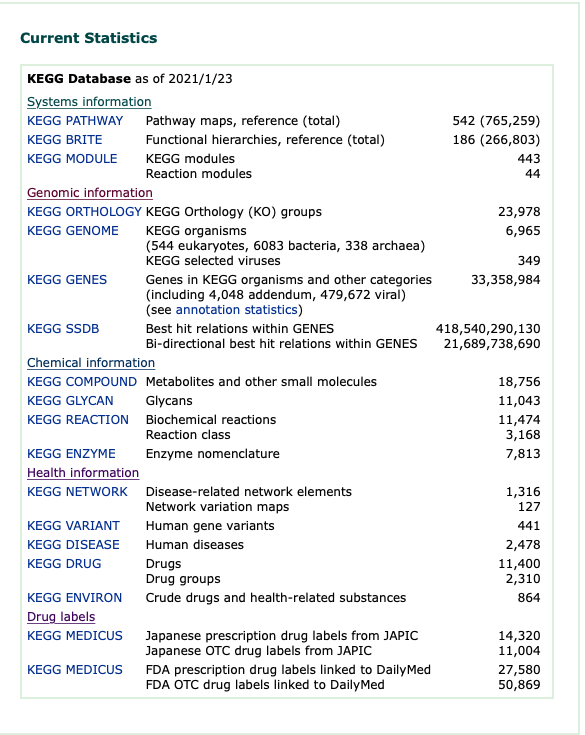

In [1]:
import urllib3
import io
import pandas as pd

In [2]:
def parseResponse(cols, *args):
    keggUrl = 'http://rest.kegg.jp/'
    
    for arg in args:
        keggUrl += arg+'/'

    df = pd.DataFrame(columns=cols)
    http = urllib3.PoolManager()
    pathwayResponse = http.request('GET', keggUrl, preload_content=False)
    pathwayResponse.auto_close=False

    for line in io.TextIOWrapper(pathwayResponse):
        df = df.append(pd.Series(line.strip('\n').split('\t'),index = df.columns), ignore_index=True)
    return df


## LIST

In [3]:
# Pathway
cols = ['pathwayId','pathwayDesc']
pathwayDF = parseResponse(cols, 'list','pathway')
print('Pathways Count: '+str(len(pathwayDF)))
pathwayDF.to_csv('data/pathway.tsv', sep='\t', index=False)
pathwayDF.head()

Pathways Count: 542


pathwayId                               pathwayDesc
0  path:map00010              Glycolysis / Gluconeogenesis
1  path:map00020                 Citrate cycle (TCA cycle)
2  path:map00030                 Pentose phosphate pathway
3  path:map00040  Pentose and glucuronate interconversions
4  path:map00051           Fructose and mannose metabolism

In [4]:
# Compound
cols = ['compoundId','compoundDesc']
compoundDF = parseResponse(cols, 'list','cpd')
print('Compounds Count: '+str(len(compoundDF)))
compoundDF.to_csv('data/compound.tsv', sep='\t', index=False)
compoundDF.head()

Compounds Count: 18756


compoundId                                       compoundDesc
0  cpd:C00001                                         H2O; Water
1  cpd:C00002                     ATP; Adenosine 5'-triphosphate
2  cpd:C00003  NAD+; NAD; Nicotinamide adenine dinucleotide; ...
3  cpd:C00004  NADH; DPNH; Reduced nicotinamide adenine dinuc...
4  cpd:C00005  NADPH; TPNH; Reduced nicotinamide adenine dinu...

In [5]:
# Reaction
cols = ['reactionId','reactionDesc']
reactionDF = parseResponse(cols, 'list','rn')
print('Reactions Count:' + str(len(reactionDF)))
reactionDF.to_csv('data/reaction.tsv', sep='\t', index=False)
reactionDF.head()

Reactions Count:11474


reactionId                                       reactionDesc
0  rn:R00001  polyphosphate polyphosphohydrolase; Polyphosph...
1  rn:R00002  Reduced ferredoxin:dinitrogen oxidoreductase (...
2  rn:R00004  diphosphate phosphohydrolase; pyrophosphate ph...
3  rn:R00005  urea-1-carboxylate amidohydrolase; Urea-1-carb...
4  rn:R00006  pyruvate:pyruvate acetaldehydetransferase (dec...

In [10]:
# KO
cols = ['koId','koDesc']
koDF = parseResponse(cols, 'list','ko')
print('KO Count:' + str(len(koDF)))
koDF.to_csv('data/ko.tsv', sep='\t', index=False)
koDF.head()

KO Count:23979


koId                                             koDesc
0  ko:K00001  E1.1.1.1, adh; alcohol dehydrogenase [EC:1.1.1.1]
1  ko:K00002  AKR1A1, adh; alcohol dehydrogenase (NADP+) [EC...
2  ko:K00003         hom; homoserine dehydrogenase [EC:1.1.1.3]
3  ko:K00004  BDH, butB; (R,R)-butanediol dehydrogenase / me...
4  ko:K00005          gldA; glycerol dehydrogenase [EC:1.1.1.6]

## LINK

In [18]:
# Reaction -> Pathway

cols = ['reactionId', 'pathwayId']
reactionPathwayLinkDF = parseResponse(cols, 'link','pathway','rn')
reactionPathwayLinkDF = reactionPathwayLinkDF.drop_duplicates()
print('Reaction2Pathway Links:' + str(len(reactionPathwayLinkDF)))
reactionPathwayLinkDF.to_csv('data/reactionPathwayLink.tsv', sep='\t', index=False)
reactionPathwayLinkDF.head()

Reaction2Pathway Links:34908


reactionId      pathwayId
0  rn:R00014  path:map00010
1  rn:R00014   path:rn00010
2  rn:R00199  path:map00010
3  rn:R00199   path:rn00010
4  rn:R00200  path:map00010

In [19]:
# Compound <-> Reaction

cols = ['compoundId', 'reactionId']
compoundReactionLinkDF = parseResponse(cols, 'link','rn', 'cpd')
compoundReactionLinkDF = compoundReactionLinkDF.drop_duplicates()
print('Compound2Reaction Links:' + str(len(compoundReactionLinkDF)))
compoundReactionLinkDF.to_csv('data/compoundReactionLink.tsv', sep='\t', index=False)
compoundReactionLinkDF.head()

Compound2Reaction Links:48260


compoundId reactionId
0  cpd:C00001  rn:R00001
1  cpd:C00001  rn:R00002
2  cpd:C00001  rn:R00004
3  cpd:C00001  rn:R00005
4  cpd:C00001  rn:R00009

In [20]:
# Compound <-> Pathway

cols = ['compoundId', 'pathwayId']
compoundPathwayLinkDF = parseResponse(cols, 'link','pathway', 'cpd')
compoundPathwayLinkDF = compoundPathwayLinkDF.drop_duplicates()
print('Compound2Pathway Links:' + str(len(compoundPathwayLinkDF)))
compoundPathwayLinkDF.to_csv('data/compoundPathwayLink.tsv', sep='\t', index=False)
compoundPathwayLinkDF.head()

Compound2Pathway Links:17372


compoundId      pathwayId
0  cpd:C00022  path:map00010
1  cpd:C00024  path:map00010
2  cpd:C00031  path:map00010
3  cpd:C00033  path:map00010
4  cpd:C00036  path:map00010

In [21]:
# KO <-> Pathway
cols = ['koId', 'pathwayId']
koPathwayLinkDF = parseResponse(cols, 'link','pathway', 'ko')
koPathwayLinkDF = koPathwayLinkDF.drop_duplicates()
print('KO2Pathway Links:' + str(len(koPathwayLinkDF)))
koPathwayLinkDF.to_csv('data/koPathwayLink.tsv', sep='\t', index=False)
koPathwayLinkDF.head()

KO2Pathway Links:84410


koId      pathwayId
0  ko:K00001  path:map00010
1  ko:K00001   path:ko00010
2  ko:K00002  path:map00010
3  ko:K00002   path:ko00010
4  ko:K00016  path:map00010

In [22]:
# KO <-> Reaction

cols = ['koId', 'reactionId']
koReactionLinkDF = parseResponse(cols, 'link','rn', 'ko')
koReactionLinkDF = koReactionLinkDF.drop_duplicates()
print('KO2Reaction Links:' + str(len(koReactionLinkDF)))
koReactionLinkDF.to_csv('data/koReactionLink.tsv', sep='\t', index=False)
koReactionLinkDF.head()

KO2Reaction Links:11044


koId reactionId
0  ko:K00001  rn:R00623
1  ko:K00001  rn:R00754
2  ko:K00001  rn:R02124
3  ko:K00001  rn:R04805
4  ko:K00001  rn:R04880

## Reaction <=> Compound  <=> Pathway

In [26]:
rnCpdPath = compoundReactionLinkDF.merge(compoundPathwayLinkDF,how='left', on='compoundId', sort=True)
rnCpdPath = rnCpdPath.drop_duplicates()
print('rn <-> cpd <-> path # of rows: '+ str(len(rnCpdPath)))
rnCpdPath.head()

rn <-> cpd <-> path # of rows: 442468


compoundId reactionId      pathwayId
0  cpd:C00001  rn:R00001  path:map00190
1  cpd:C00001  rn:R00001  path:map00195
2  cpd:C00001  rn:R00001  path:map00710
3  cpd:C00001  rn:R00001  path:map01100
4  cpd:C00001  rn:R00001  path:map01120

In [27]:
rnCpdPath[rnCpdPath['compoundId'] == 'cpd:C00031'] #glucose

compoundId reactionId      pathwayId
253475  cpd:C00031  rn:R00010  path:map00010
253476  cpd:C00031  rn:R00010  path:map00030
253477  cpd:C00031  rn:R00010  path:map00052
253478  cpd:C00031  rn:R00010  path:map00500
253479  cpd:C00031  rn:R00010  path:map00520
...            ...        ...            ...
257345  cpd:C00031  rn:R12250  path:map04973
257346  cpd:C00031  rn:R12250  path:map04976
257347  cpd:C00031  rn:R12250  path:map04978
257348  cpd:C00031  rn:R12250  path:map05111
257349  cpd:C00031  rn:R12250  path:map05230

[3875 rows x 3 columns]

In [28]:
rnCpdPath.to_csv('data/reaction-compound-pathway.tsv', sep='\t', index=False)

## Reaction <=> KO  <=> Pathway

In [31]:
rnKoPath = koPathwayLinkDF.merge(koReactionLinkDF,how='left', on='koId', sort=True)
rnKoPath.drop_duplicates()
print('rn <-> ko <-> path # of rows: '+ str(len(rnKoPath)))
rnKoPath.head()

rn <-> ko <-> path # of rows: 142714


koId      pathwayId reactionId
0  ko:K00001  path:map00010  rn:R00623
1  ko:K00001  path:map00010  rn:R00754
2  ko:K00001  path:map00010  rn:R02124
3  ko:K00001  path:map00010  rn:R04805
4  ko:K00001  path:map00010  rn:R04880

In [30]:
rnKoPath.to_csv('data/reaction-KO-pathway.tsv', sep='\t', index=False)

## Reaction <=> KO <=> Compound <=> Pathway

In [35]:
rnKoCpdPath = pd.merge(rnCpdPath, rnKoPath, how='left', on=['reactionId', 'pathwayId'], sort=True )
rnKoCpdPath.drop_duplicates()
print('rn <-> ko <-> cpd <-> path # of rows: '+ str(len(rnKoCpdPath)))
rnKoCpdPath.head()

rn <-> ko <-> cpd <-> path # of rows: 480485


compoundId reactionId      pathwayId koId
0  cpd:C00001  rn:R00001  path:map00190  NaN
1  cpd:C00001  rn:R00001  path:map00195  NaN
2  cpd:C00001  rn:R00001  path:map00710  NaN
3  cpd:C00001  rn:R00001  path:map01100  NaN
4  cpd:C00001  rn:R00001  path:map01120  NaN

In [36]:
rnKoCpdPath.to_csv('data/rn-KO-cpd-path.tsv', sep='\t', index=False)

## GET

This gets back given DB entries. For e.g.:<br/>
    - For Reaction: http://rest.kegg.jp/get/rn:R00001 <br/>
    - For Coumpounds: http://rest.kegg.jp/get/cpd:C00001 <br/>
    - For Pathways: http://rest.kegg.jp/get/path:map00010


### Reaction

In [38]:
def hasDigit(string):
    for s in string:
        if s.isdigit():
            return True
    return False

In [39]:
def makeDataFrame(df, idColName): 
    #count = 0
    listOfDict = []
    keggUrl = 'http://rest.kegg.jp/'
    nonColumnChars = ['-', ' ', ';']

    for row in df.iterrows():
        dictionary = {}
        lastKey = ''
        item = row[1][idColName]
        newKeggUrl = keggUrl + 'get/' + item

        http = urllib3.PoolManager()
        pathwayResponse = http.request('GET', newKeggUrl, preload_content=False)
        pathwayResponse.auto_close=False

        #count += 1

        for line in io.TextIOWrapper(pathwayResponse):
            lineElements = line.split('  ')
            listofElements = [x.strip() for x in lineElements if x]

            if listofElements[0].isupper() \
            and not hasDigit(listofElements[0]) \
            and not any(map(listofElements[0].__contains__, nonColumnChars)) \
            and len(listofElements) > 1 \
            and len(listofElements[0]) > 3:
                
                lastKey = listofElements[0]
                    
                if lastKey == 'ENZYME':
                    dictionary[lastKey] = ' | '.join(listofElements[1:])
                elif lastKey in dictionary.keys():
                    dictionary[lastKey] += (' | '+'-'.join(listofElements[1:]))
                else:
                    dictionary[lastKey] = ' '.join(listofElements[1:])
            else:
                if lastKey == 'COMMENT':
                    dictionary[lastKey] += (' '+' '.join(listofElements))
                else:
                    dictionary[lastKey] += (' | '+'-'.join(listofElements))

            dictionary[lastKey] = dictionary[lastKey].replace(' | ///', '')
        listOfDict.append(dictionary)
        #if count == 100:
            #print(dictionary)
            #break;
    return pd.DataFrame(listOfDict)


In [152]:
%%time

keggReactionsDF = makeDataFrame(reactionDF, 'reactionId')

CPU times: user 23.8 s, sys: 5.24 s, total: 29 s
Wall time: 1h 13min 7s


In [153]:
keggReactionsDF.head()

ENTRY                                               NAME  \
0  R00001 Reaction                 polyphosphate polyphosphohydrolase   
1  R00002 Reaction  Reduced ferredoxin:dinitrogen oxidoreductase (...   
2  R00004 Reaction  diphosphate phosphohydrolase; | pyrophosphate ...   
3  R00005 Reaction                  urea-1-carboxylate amidohydrolase   
4  R00006 Reaction  pyruvate:pyruvate acetaldehydetransferase (dec...   

                                          DEFINITION  \
0     Polyphosphate + n H2O <=> (n+1) Oligophosphate   
1  16 ATP + 16 H2O + 8 Reduced ferredoxin <=> 8 e...   
2             Diphosphate + H2O <=> 2 Orthophosphate   
3     Urea-1-carboxylate + H2O <=> 2 CO2 + 2 Ammonia   
4                2-Acetolactate + CO2 <=> 2 Pyruvate   

                                            EQUATION    ENZYME      DBLINKS  \
0                 C00404 + n C00001 <=> (n+1) C02174  3.6.1.10  RHEA: 22455   
1  16 C00002 + 16 C00001 + 8 C00138 <=> 8 C05359 ...  1.18.6.1          NaN   
2                       C00013 + C00001 <=> 2 C00009   3.6.1.1  RHEA: 24579   
3            C01010 + C00001 <=> 2 C00011 + 2 C00014  3.5.1.54  RHEA: 19032   
4                       C00900 + C00011 <=> 2 C00022   2.2.1.6          NaN   

                                             COMMENT                 RCLASS  \
0                                                NaN                    NaN   
1  a part of multi-step reaction (see R05185, R00...  RC00002 C00002_C00008   
2                                                NaN                    NaN   
3  The yeast enzyme (but not that from green alga...  RC02756 C00011_C01010   
4   TPP-dependent enzymatic reaction (R00014+R03050)  RC00106 C00022_C00900   

                                             PATHWAY  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  rn00220 Arginine biosynthesis | rn00791-Atrazi...   
4                                                NaN   

                                           ORTHOLOGY MODULE REMARK REFERENCE  \
0                                                NaN    NaN    NaN       NaN   
1                                                NaN    NaN    NaN       NaN   
2                                                NaN    NaN    NaN       NaN   
3  K01457 allophanate hydrolase [EC:3.5.1.54] | K...    NaN    NaN       NaN   
4  K01652 acetolactate synthase I/II/III large su...    NaN    NaN       NaN   

  AUTHORS TITLE JOURNAL BANYULS  
0     NaN   NaN     NaN     NaN  
1     NaN   NaN     NaN     NaN  
2     NaN   NaN     NaN     NaN  
3     NaN   NaN     NaN     NaN  
4     NaN   NaN     NaN     NaN

In [154]:
keggReactionsDF.to_csv('data/KEGG-Reactions.tsv', sep='\t', index=False)

### Pathways

In [84]:
%%time

keggPathwaysDF = makeDataFrame(pathwayDF, 'pathwayId')


CPU times: user 26.9 ms, sys: 5.47 ms, total: 32.3 ms
Wall time: 4.06 s


In [64]:
keggPathwaysDF.head()

ENTRY                                               NAME  \
0  map00010 Pathway  Glycolysis / Gluconeogenesis | DESCRIPTION Gly...   
1  map00020 Pathway  Citrate cycle (TCA cycle) | DESCRIPTION The ci...   
2  map00030 Pathway  Pentose phosphate pathway | DESCRIPTION The pe...   
3  map00040 Pathway           Pentose and glucuronate interconversions   
4  map00051 Pathway                    Fructose and mannose metabolism   

                                               CLASS  \
0  Metabolism; Carbohydrate metabolism | PATHWAY_...   
1  Metabolism; Carbohydrate metabolism | PATHWAY_...   
2  Metabolism; Carbohydrate metabolism | PATHWAY_...   
3  Metabolism; Carbohydrate metabolism | PATHWAY_...   
4  Metabolism; Carbohydrate metabolism | PATHWAY_...   

                                              MODULE  \
0  M00001 Glycolysis (Embden-Meyerhof pathway), g...   
1  M00003 Gluconeogenesis, oxaloacetate => fructo...   
2  M00004 Pentose phosphate pathway (Pentose phos...   
3  M00014 Glucuronate pathway (uronate pathway) [...   
4  M00114 Ascorbate biosynthesis, plants, fructos...   

                                             DISEASE  \
0  H00069 Glycogen storage disease | H00071-Hered...   
1  H00073 Pyruvate carboxylase deficiency | H0046...   
2  H00196 Phosphoribosylpyrophosphate synthetase ...   
3  H01065 Pentosuria | H01193-Familial tumoral ca...   
4  H00118 Congenital disorders of glycosylation t...   

                                             DBLINKS  \
0                                GO: 0006096 0006094   
1                                        GO: 0006099   
2                                        GO: 0006098   
3                                                NaN   
4  GO: 0006000 0006013 | REL_PATHWAY map00010-Gly...   

                                           REFERENCE  \
0                               (map 1) | (map 1) |    
1                               (map 2) | (map 3) |    
2  (map 3) | (map 4) |  | PMID:12700258 | PMID:16...   
3  PMID:11741871 | PMID:15697206 | PMID:10572115 ...   
4                                                NaN   

                                             AUTHORS  \
0  Nishizuka Y (ed). | Nishizuka Y, Seyama Y, Ika...   
1  Nishizuka Y (ed). | Nishizuka Y, Seyama Y, Ika...   
2  Nishizuka Y (ed). | Nishizuka Y, Seyama Y, Ika...   
3  Yew WS, Gerlt JA. | Yew WS, Akana J, Wise EL, ...   
4                                                NaN   

                                               TITLE  \
0  [Metabolic Maps] (In Japanese) | [Cellular Fun...   
1  [Metabolic Maps] (In Japanese) | [Cellular Fun...   
2  [Metabolic Maps] (In Japanese) | [Cellular Fun...   
3  Utilization of L-ascorbate by Escherichia coli...   
4                                                NaN   

                                             JOURNAL KO_PATHWAY DRUG COMPOUND  
0  Tokyo Kagaku Dojin (1980) | Tokyo Kagaku Dojin...    ko00010  NaN      NaN  
1  Tokyo Kagaku Dojin (1980) | Tokyo Kagaku Dojin...    ko00020  NaN      NaN  
2  Tokyo Kagaku Dojin (1980) | Tokyo Kagaku Dojin...    ko00030  NaN      NaN  
3  J Bacteriol 184:302-6 (2002) | DOI:10.1128/JB....    ko00040  NaN      NaN  
4                                                NaN    ko00051  NaN      NaN

In [65]:
keggPathwaysDF.to_csv('data/KEGG-Pathways.tsv', sep='\t', index=False)

### Compounds

In [112]:
%%time

keggCompoundsDF = makeDataFrame(compoundDF, 'compoundId')

CPU times: user 44.6 s, sys: 8.76 s, total: 53.4 s
Wall time: 2h 5min 40s


In [113]:
keggCompoundsDF.head()

ENTRY                                               NAME  \
0  C00001 Compound                                       H2O; | Water   
1  C00002 Compound                   ATP; | Adenosine 5'-triphosphate   
2  C00003 Compound  NAD+; | NAD; | Nicotinamide adenine dinucleoti...   
3  C00004 Compound  NADH; | DPNH; | Reduced nicotinamide adenine d...   
4  C00005 Compound  NADPH; | TPNH; | Reduced nicotinamide adenine ...   

         FORMULA EXACT_MASS MOL_WEIGHT           REMARK  \
0            H2O    18.0106    18.0153  Same as: D00001   
1  C10H16N5O13P3   506.9957    507.181  Same as: D08646   
2  C21H28N7O14P2   664.1169    664.433  Same as: D00002   
3  C21H29N7O14P2   665.1248    665.441              NaN   
4  C21H30N7O17P3   745.0911   745.4209              NaN   

                                            REACTION  \
0  R00001 R00002 R00004 R00005 R00009 R00010 R000...   
1  R00002 R00076 R00085 R00086 R00087 R00088 R000...   
2  R00023 R00090 R00091 R00092 R00093 R00094 R000...   
3  R00023 R00090 R00091 R00092 R00093 R00094 R000...   
4  R00105 R00106 R00108 R00109 R00111 R00112 R001...   

                                             PATHWAY  \
0  map00190 Oxidative phosphorylation | map00195-...   
1  map00190 Oxidative phosphorylation | map00195-...   
2  map00190 Oxidative phosphorylation | map00730-...   
3  map00190 Oxidative phosphorylation | map01100-...   
4  map00195 Photosynthesis | map00480-Glutathione...   

                                              MODULE  \
0       M00416 Cytochrome aa3-600 menaquinol oxidase   
1  M00049 Adenine ribonucleotide biosynthesis, IM...   
2  M00115 NAD biosynthesis, aspartate => quinolin...   
3  M00142 NADH:ubiquinone oxidoreductase, mitocho...   
4                                                NaN   

                                              ENZYME  ... ORIGINAL REPEAT  \
0  1.1.1.1 | 1.1.1.22 | 1.1.1.23 | 1.1.1.115 |  |...  ...      NaN    NaN   
1  1.1.98.6 | 1.2.1.30 | 1.2.1.95 | 1.2.1.101 |  ...  ...      NaN    NaN   
2  1.1.1.1 | 1.1.1.3 | 1.1.1.4 | 1.1.1.6 |  | 1.1...  ...      NaN    NaN   
3  1.1.1.1 | 1.1.1.3 | 1.1.1.4 | 1.1.1.6 |  | 1.1...  ...      NaN    NaN   
4  1.1.1.1 | 1.1.1.2 | 1.1.1.3 | 1.1.1.10 |  | 1....  ...      NaN    NaN   

  SEQUENCE ORGANISM TYPE GENE REFERENCE AUTHORS TITLE JOURNAL  
0      NaN      NaN  NaN  NaN       NaN     NaN   NaN     NaN  
1      NaN      NaN  NaN  NaN       NaN     NaN   NaN     NaN  
2      NaN      NaN  NaN  NaN       NaN     NaN   NaN     NaN  
3      NaN      NaN  NaN  NaN       NaN     NaN   NaN     NaN  
4      NaN      NaN  NaN  NaN       NaN     NaN   NaN     NaN  

[5 rows x 26 columns]

In [114]:
keggCompoundsDF.to_csv('data/KEGG-Compounds.tsv', sep='\t', index=False)

### KO

In [40]:
%%time

keggOrthologyDF = makeDataFrame(koDF, 'koId')

CPU times: user 5min 24s, sys: 13.2 s, total: 5min 37s
Wall time: 3h 56min 51s


In [43]:
keggOrthologyDF.head()

ENTRY           NAME  \
0  K00001 KO  E1.1.1.1, adh   
1  K00002 KO    AKR1A1, adh   
2  K00003 KO            hom   
3  K00004 KO      BDH, butB   
4  K00005 KO           gldA   

                                          DEFINITION  \
0                 alcohol dehydrogenase [EC:1.1.1.1]   
1         alcohol dehydrogenase (NADP+) [EC:1.1.1.2]   
2              homoserine dehydrogenase [EC:1.1.1.3]   
3  (R,R)-butanediol dehydrogenase / meso-butanedi...   
4                glycerol dehydrogenase [EC:1.1.1.6]   

                                             PATHWAY  \
0  ko00010 Glycolysis / Gluconeogenesis | ko00071...   
1  ko00010 Glycolysis / Gluconeogenesis | ko00040...   
2  ko00260 Glycine, serine and threonine metaboli...   
3                       ko00650 Butanoate metabolism   
4  ko00561 Glycerolipid metabolism | ko00640-Prop...   

                                               BRITE  \
0  KEGG Orthology (KO) [BR:ko00001] | 09100 Metab...   
1  KEGG Orthology (KO) [BR:ko00001] | 09100 Metab...   
2  KEGG Orthology (KO) [BR:ko00001] | 09100 Metab...   
3  KEGG Orthology (KO) [BR:ko00001] | 09100 Metab...   
4  KEGG Orthology (KO) [BR:ko00001] | 09100 Metab...   

                                             DBLINKS  \
0  RN: R00623 R00754 R02124 R04805 R04880 R05233 ...   
1  RN: R00746 R01041 R01481 R05231 | COG: COG0656...   
2     RN: R01773 R01775 | COG: COG0460 | GO: 0004412   
3  RN: R02855 R02946 R10504 | COG: COG1063 | GO: ...   
4  RN: R01034 R10715 R10717 | COG: COG0371 | GO: ...   

                                               GENES  \
0  DME: Dmel_CG3481(Adh) | DER: 6540581 | DSE: 66...   
1  HSA: 10327(AKR1A1) | PTR: 741418(AKR1A1) | PPS...   
2  MPHA: 105828096 | ALY: 9308035 | CSAT: 1047064...   
3  SCE: YAL060W(BDH1) YAL061W(BDH2) | KLA: KLLA0_...   
4  OTW: 112242590 112242862 | PXY: 105396559 | GS...   

                                              MODULE  \
0                                                NaN   
1  M00014 Glucuronate pathway (uronate pathway) |...   
2  M00017 Methionine biosynthesis, apartate => ho...   
3                                                NaN   
4                                                NaN   

                       REFERENCE  \
0                            NaN   
1                   PMID:2498333   
2                            NaN   
3  PMID:10938079 | PMID:18245243   
4   PMID:8132480 | PMID:18179582   

                                             AUTHORS  \
0                                                NaN   
1         Bohren KM, Bullock B, Wermuth B, Gabbay KH   
2                                                NaN   
3  Gonzalez E, Fernandez MR, Larroy C, Sola L, Pe...   
4  Truniger V, Boos W | Subedi KP, Kim I, Kim J, ...   

                                               TITLE  \
0                                                NaN   
1  The aldo-keto reductase superfamily. cDNAs and...   
2                                                NaN   
3  Characterization of a (2R,3R)-2,3-butanediol d...   
4  Mapping and cloning of gldA, the structural ge...   

                                             JOURNAL  \
0                                                NaN   
1                     J Biol Chem 264:9547-51 (1989)   
2                                                NaN   
3  J Biol Chem 275:35876-85 (2000) | DOI:10.1074/...   
4  J Bacteriol 176:1796-800 (1994) | DOI:10.1128/...   

                    SEQUENCE DISEASE  
0                        NaN     NaN  
1                [hsa:10327]     NaN  
2                        NaN     NaN  
3              [sce:YAL060W]     NaN  
4  [eco:b3945] | [eco:b3945]     NaN

In [42]:
keggOrthologyDF.to_csv('data/KEGG-Orthology.tsv', sep='\t', index=False)

## CONV

In [3]:
%%time
# Compound <-> CHEBI

cols = ['compoundId', 'CHEBI']
compoundChebiConvDF = parseResponse(cols, 'conv', 'chebi', 'cpd')
print('CompoundCHEBI Conversions:' + str(len(compoundChebiConvDF)))
compoundChebiConvDF.to_csv('data/compoundChebiConv.tsv', sep='\t', index=False)
compoundChebiConvDF.head()

CompoundCHEBI Conversions:16993
CPU times: user 23.8 s, sys: 60.7 ms, total: 23.9 s
Wall time: 24.4 s


compoundId        CHEBI
0  cpd:C00462  chebi:16042
1  cpd:C00742  chebi:17051
2  cpd:C08142  chebi:28741
3  cpd:C00698  chebi:17996
4  cpd:C07755   chebi:6636